## Reading in C data.txt file
### This code shows the segmented image outputted by K-means distribution in C

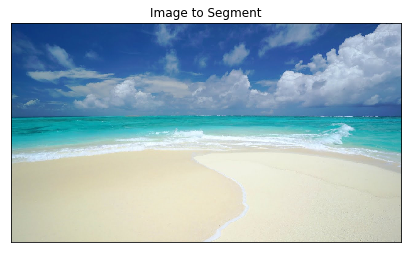

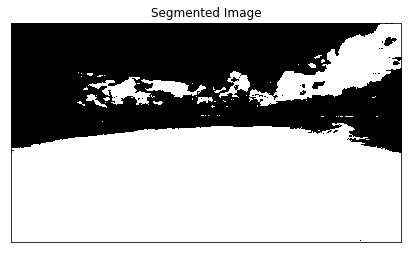

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_segmented_path = "./segment.jpg"

def show_original():
    '''
    SHOW ORIGINAL IMAGE MEANT TO BE SEGMENTED
    '''
    img = cv2.imread(image_segmented_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(7, 7))
    plt.title("Image to Segment")
    plt.xticks([]), plt.yticks([])
    plt.imshow(img)
    plt.show()
    
def show_segmented():
    '''
    SHOW SEGMENTED IMAGE FROM 
    '''
    # Read data out-putted from C-file
    with open('data.txt', 'r') as f:
        data = f.read()
    # Str -> Int
    data_arr = [int(i) for i in data.split()]
    
    img = cv2.imread(image_segmented_path)
    h, w, ch = img.shape
    
    img_clustered = np.reshape(data_arr, ((h, w)))

    try:
        plt.figure(figsize=(7, 7))
        plt.title("Segmented Image")
        plt.imshow(img_clustered, cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.show()
    except Exception as e:
        print(e)
        
    return img_clustered
        
show_original()
img_clusterd_c = show_segmented()

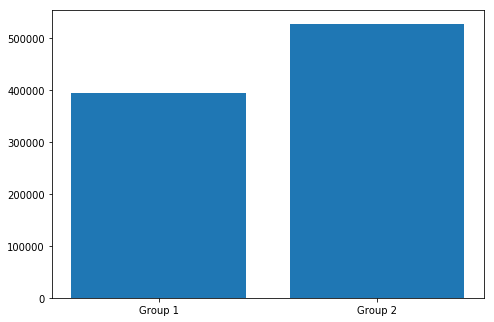

In [28]:
fig = plt.figure()
plt.title("Pixel count in each group")
ax = fig.add_axes([0,0,1,1])
groups = ['Group 1', 'Group 2']
group_counts = [393991, 527609]
ax.bar(groups, group_counts)
plt.show()

## Comparing C and Python
### This code compares the python and C outputs

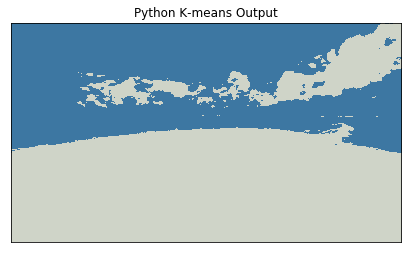

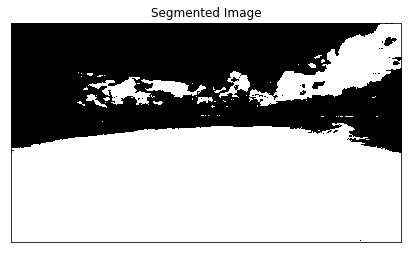

In [20]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img = np.float32(img)

def compute_mean(cluster, height, k):
    """
    Computes the mean (centers) of k clusters 
    -----
    args cluster: the array of cluster values
    args height: size of original data
    args k: number of clusters
    """
    sums = np.zeros((2,2))
    centers = np.zeros((k,2))
    count_0 = 0
    count_1 = 0
    for i in range(height):
        if(cluster[i] == 0):
            sums[0][0] += data[i][0] 
            sums[0][1] += data[i][1]
            count_0 += 1
        else:
            sums[1][0] += data[i][0] 
            sums[1][1] += data[i][1]
            count_1 += 1

    centers[0][0] = sums[0][0] / count_0
    centers[0][1] = sums[0][1] / count_0
    centers[1][0] = sums[1][0] / count_1
    centers[1][1] = sums[1][1] / count_1
    
    return centers

def k_means(img, k, iter_n):
    """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    height, width, ch = img.shape
    
    # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    centers = np.random.random_sample((k, ch))*255
    
    cluster_iter = []
    for i in range(iter_n):
        # 2. Assign each point to the nearest cluster
        # Arr shape = (K, height, width), where K is cluster group
        clusters = calc_distance(img, centers)
        cluster_iter.append(clusters)
        
        # 3. Compute new mean for each cluster 
        new_centers = np.empty(shape=(k, ch))
        for j in range(k):
            np.mean(img[clusters[0]==j], axis=0, out=new_centers[j])
            
        # If new centers and centers are the same, exit iteration
        if((centers == new_centers).all()):
            break
        else:
            centers = new_centers
            
    return cluster_iter
    
def calc_distance(points, centers):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    dists = []
    # Calculate the distance between each point and each center
    for center in centers:
        dists.append([points - center])
    dists = np.linalg.norm(dists, axis=-1)
    
    # Return closest center of each point
    return np.argmin(dists, axis=0)

def euclidian_distance(center, point):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    # Calculate the distance between each point and each center
    return np.linalg.norm(point - center, axis=1)

def show_plot(imgs, cols=3, isGray = False):  
    arr = [131, 132, 133]
    
    j=0
    for i in range(len(imgs)):
        if(i%3==0):
            plt.figure(figsize=(10,10))
            j=0
        plt.subplot(arr[j])
        plt.xticks([]), plt.yticks([])
        plt.imshow(imgs[i])
        j+=1
        if(i!=len(imgs)-1):
            plt.title("Iteration number: "+str(i))
            
    plt.title("Final Iteration")    
    plt.show()
       
def show_figures(imgs, isGray = False, isEM = False):
    """
    Plots figures in groups of three
    -----
    args imgs: array of images to be shown
    args isGray: if cmap = gray or not, defaulted to false
    """
    length = len(imgs)
    arr = [131, 132, 133]
    
    j=0
    for i in range(len(imgs)):
        if(i%3==0):
            plt.figure(figsize=(10,10))
            j=0
        plt.subplot(arr[j])
        plt.xticks([]), plt.yticks([])
        
        if(not isEM and isGray):
            plt.imshow(imgs[i][0].astype(np.uint8), cmap='gray')
        elif(not isEM):
            plt.imshow(imgs[i][0].astype)
        elif(isGray):
            plt.imshow(imgs[i].astype(np.uint8),  cmap='gray')
        else:
            plt.imshow(imgs[i].astype(np.uint8))
        
        j+=1
        if(i!=len(imgs)-1):
            plt.title("Iteration number: "+str(i))
            
    plt.title("Final Iteration")    
    plt.show()

def k_means_2(img, k, iter_n):
    """
    Segments the image, used for color (not grayscale)
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    w, h, ch = img.shape

    # Get image data points
    data_pts = img.reshape((w*h,ch))
    data_pts = np.float32(data_pts)
    
     # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    center = data_pts[np.random.randint(data_pts.shape[0], size=k)]
  
    
    
    # 2. Assign each point to the nearest cluster
    vect = np.zeros(data_pts.shape[0], dtype=np.float64)
    dist = np.zeros([data_pts.shape[0], k], dtype=np.float64)
   
    cluster_iter = []
    l=0
    for i in range(iter_n):
        for i, j in enumerate(center):
            # Calculate distance
            # Assign each point to nearest cluster by calculating its distance to each center
            dist[:, i] = euclidian_distance(j, data_pts)

        # 3. Compute new mean for each cluster 
        min_dist = np.argmin(dist, axis=1)
    

        # Adjust center of each cluster
        for c in range(k):
            center[c] = np.mean(data_pts[min_dist == c], 0)
        
        # Store first 5 iterations
        center_temp = np.uint8(center)
        cluster_tmp = center_temp[min_dist.flatten()]
        if(ch>1):
            cluster_tmp = cluster_tmp.reshape((w, h, ch))
        else:
            cluster_tmp = cluster_tmp.reshape((w, h))
        cluster_iter.append(cluster_tmp)

    # convert back to int
    center = np.uint8(center)
    
    # get clusters
    cluster = center[min_dist.flatten()]
    if(ch==1):
        cluster = cluster.reshape((w, h))
    else:
        cluster = cluster.reshape((w, h, ch))


    return cluster_iter

def euclidian_distance(center, point):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    # Calculate the distance between each point and each center
    return np.linalg.norm(point - center, axis=1)

def show_plot(imgs, cols=3, isGray = False):  
    plt.figure(figsize=(7,7))
    plt.xticks([]), plt.yticks([])
    plt.title("Python K-means Output")    
    plt.imshow(imgs[4])
    plt.show()
    
    return imgs
    

img = cv2.imread("segment.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
clusters = k_means_2(img, k=2, iter_n=6)

final_plot = show_plot(clusters)

show_segmented()

## Miscellaneous